In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
#csv = pd.read_csv("data_tran.csv")
#csv.columns
#csv.columns = ['Census Tract', 'Grade Level', 'a_year_before', 'target', 'year', 'Wht%', 'Blc%', 'Ind%', 'Asn%', 'Mix%', 'His%', '0-4', '5-9', '10-14']
#csv.head()
#csv.to_csv("panel_data.csv")

In [2]:
panel_data = pd.read_csv("panel_data.csv")
panel_data.head()

,Census Tract,Grade Level,year,target,a_year_before,Wht%,Blc%,Ind%,Asn%,Mix%,His%,0-4,9-May,14-Oct
0,18.0,K,20022003,0,0,0.0,0.333333,0.0,0.0,0.0,0.666667,0,0,0
1,18.0,1,20022003,0,0,0.0,0.333333,0.0,0.0,0.0,0.666667,0,0,0
2,18.0,2,20022003,0,1,0.0,0.333333,0.0,0.0,0.0,0.666667,0,0,0
3,18.0,3,20022003,1,0,0.0,0.333333,0.0,0.0,0.0,0.666667,0,0,0
4,18.0,4,20022003,0,0,0.0,0.333333,0.0,0.0,0.0,0.666667,0,0,0


In [3]:
dataK = panel_data.ix[panel_data['Grade Level'] == 'K']
data1 = panel_data.ix[panel_data['Grade Level'] == '1']
data2 = panel_data.ix[panel_data['Grade Level'] == '2']
data3 = panel_data.ix[panel_data['Grade Level'] == '3']
data4 = panel_data.ix[panel_data['Grade Level'] == '4']
data5 = panel_data.ix[panel_data['Grade Level'] == '5']
data5.shape

(1413, 14)

In [4]:
import numpy as np
a = np.array(dataK['Census Tract'], dtype=pd.Series)
b = np.array(dataK['year'], dtype=pd.Series)

In [5]:
dataK.index = [b,a]
data1.index = [b,a]
data2.index = [b,a]
data3.index = [b,a]
data4.index = [b,a]
data5.index = [b,a]
data2.head()

Census Tract Grade Level      year  target  a_year_before  \
20022003 18.0          18.0           2  20022003       0              1   
         20.0          20.0           2  20022003       5              1   
         22.0          22.0           2  20022003      55             61   
         30.0          30.0           2  20022003      12             15   
         34.0          34.0           2  20022003      14             17   

                   Wht%      Blc%      Ind%      Asn%      Mix%      His%  \
20022003 18.0  0.000000  0.333333  0.000000  0.000000  0.000000  0.666667   
         20.0  0.021008  0.012605  0.006303  0.042017  0.006303  0.909664   
         22.0  0.069246  0.029532  0.004073  0.082485  0.020367  0.787169   
         30.0  0.535912  0.024862  0.000000  0.129834  0.082873  0.226519   
         34.0  0.559415  0.000000  0.000000  0.186472  0.047532  0.206581   

               0-4  9-May  14-Oct  
20022003 18.0    0      0       0  
         20.0    3     -3      -1  
         22.0    5     -7      -3  
         30.0    1     -2      -2  
         34.0    2     -5      -2

In [6]:
r = dataK.ix[:,4:]
r.head()

a_year_before      Wht%      Blc%      Ind%      Asn%  \
20022003 18.0              0  0.000000  0.333333  0.000000  0.000000   
         20.0              4  0.021008  0.012605  0.006303  0.042017   
         22.0             49  0.069246  0.029532  0.004073  0.082485   
         30.0             16  0.535912  0.024862  0.000000  0.129834   
         34.0             13  0.559415  0.000000  0.000000  0.186472   

                   Mix%      His%  0-4  9-May  14-Oct  
20022003 18.0  0.000000  0.666667    0      0       0  
         20.0  0.006303  0.909664    3     -3      -1  
         22.0  0.020367  0.787169    5     -7      -3  
         30.0  0.082873  0.226519    1     -2      -2  
         34.0  0.047532  0.206581    2     -5      -2

In [7]:
def med_rela_abs_error(ser_true, ser_pred):
    return np.median(np.abs((ser_pred-ser_true)/(ser_pred+2)))

In [8]:
def model_performance(data):
    msk = np.random.rand(len(data)) < 0.7
    X_train = data[msk]
    X_train = X_train.ix[:,4:]
    y_train = data[msk]['target']
    X_test = data[~msk]
    X_test = X_test.ix[:,4:]
    y_test = data[~msk]['target']
    reg  = PanelOLS(y=y_train,x=X_train,entity_effects=True)
    reg2  = PanelOLS(y=y_test,x=X_test,entity_effects=True)
    yhat = np.dot(reg2._x.values,reg._beta_raw)
    y = np.array(y_test, dtype=pd.Series)
    mrae = med_rela_abs_error(y, yhat)
    return mrae;
    

In [9]:
def ols_model_performance(data):
    msk = np.random.rand(len(data)) < 0.7
    X_train = data[msk]
    X_train = X_train.ix[:,4:]
    y_train = data[msk]['target']
    X_test = data[~msk]
    X_test = X_test.ix[:,4:]
    y_test = data[~msk]['target']
    reg  = OLS(y=y_train,x=X_train)
    reg2  = OLS(y=y_test,x=X_test)
    yhat = np.dot(reg2._x.values,reg._beta_raw)
    y = np.array(y_test, dtype=pd.Series)
    mrae = med_rela_abs_error(y, yhat)
    return mrae;

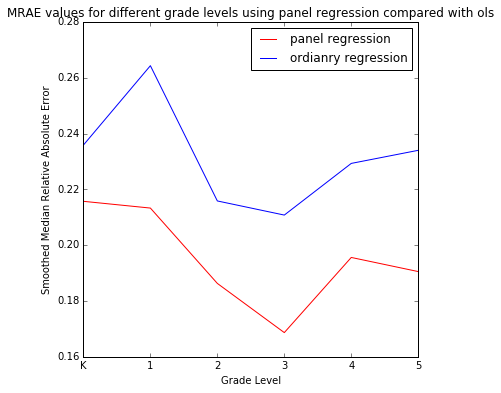

In [18]:
from pandas.stats.plm import PanelOLS
from pandas.stats.plm import OLS
pmraes = []
pmraes.append(model_performance(dataK))
pmraes.append(model_performance(data1))
pmraes.append(model_performance(data2))
pmraes.append(model_performance(data3))
pmraes.append(model_performance(data4))
pmraes.append(model_performance(data5))

omraes = []
omraes.append(ols_model_performance(dataK))
omraes.append(ols_model_performance(data1))
omraes.append(ols_model_performance(data2))
omraes.append(ols_model_performance(data3))
omraes.append(ols_model_performance(data4))
omraes.append(ols_model_performance(data5))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (6, 6))
plt.title('MRAE values for different grade levels using panel regression compared with ols')
x = np.array([0,1,2,3,4,5])
grades = ['K','1','2','3','4','5']
plt.xticks(x, grades)
plt.plot(x,pmraes,'r',label = 'panel regression')
plt.plot(x,omraes,'b',label = 'ordianry regression')
plt.xlabel('Grade Level')
plt.ylabel('Smoothed Median Relative Absolute Error')
plt.legend(loc="upper right")
plt.show()